# Feature Engineering

In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_excel('inputs/Clean Pune Real Estate Data.xlsx')
data.head()

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs clean
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,pune,maharashtra,india,2.0,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


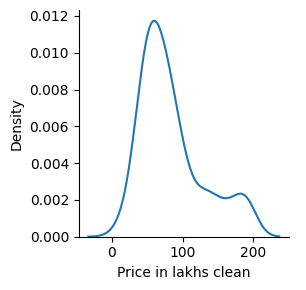

In [15]:
sns.FacetGrid(data).map(sns.kdeplot,"Price in lakhs clean").add_legend();
plt.show()

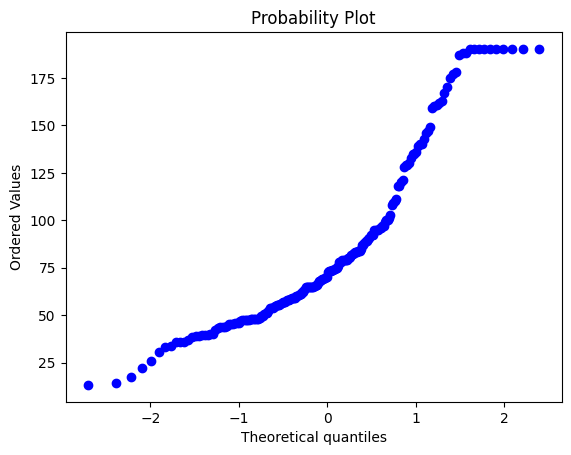

In [19]:
#Q-Q plot for checking if price is log-normal
import scipy
scipy.stats.probplot(data['Price in lakhs clean'].values, plot=plt)
plt.show()

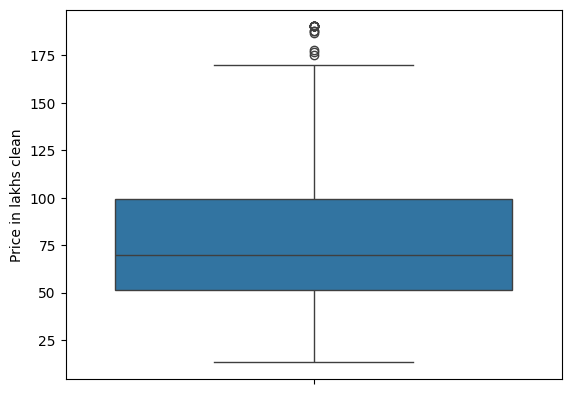

In [13]:
sns.boxplot(y="Price in lakhs clean", data = data)
plt.show()

In [16]:
import numpy as np
data['log Price in lakhs clean'] = np.log(data['Price in lakhs clean']+1)

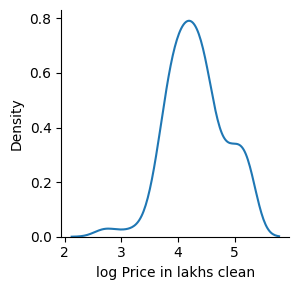

In [17]:
sns.FacetGrid(data).map(sns.kdeplot,"log Price in lakhs clean").add_legend();
plt.show()

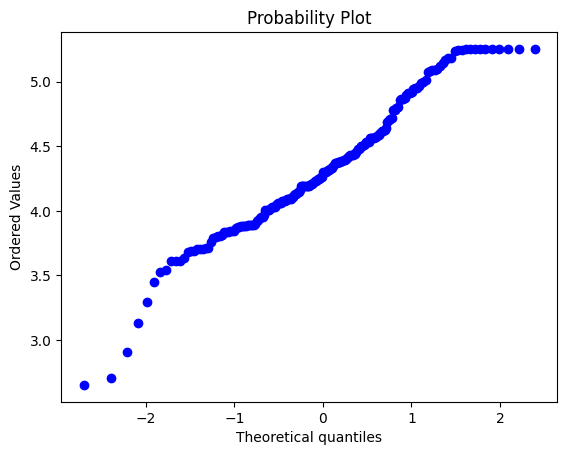

In [18]:
#Q-Q plot for checking if price is log-normal
import scipy
scipy.stats.probplot(data['log Price in lakhs clean'].values, plot=plt)
plt.show()

In [43]:
# Treating outliers in the numeric columns
cols_to_treat = ['Property Area in Sq. Ft. clean','Price in lakhs clean']

print("\nDistribution (raw):")
display(data[cols_to_treat].describe())        

# Outlier treatment
def clip_outliers(df,col):
    q_l = df[col].min()
    q_h = df[col].quantile(0.95)
    df[col] = df[col].clip(lower = q_l, upper = q_h)
    return df

for col in cols_to_treat:
    df = clip_outliers(data,col)
    

print("\nDistribution (after outlier treatment):")
display(df[cols_to_treat].describe())  


Distribution (raw):


,Property Area in Sq. Ft. clean,Price in lakhs clean
count,200.000000,199.000000
mean,878.655000,84.213065
std,334.181777,44.552319
min,113.000000,13.190000
25%,670.000000,51.500000
50%,800.500000,70.000000
75%,1041.250000,99.435001
max,1671.800000,190.300000



Distribution (after outlier treatment):


,Property Area in Sq. Ft. clean,Price in lakhs clean
count,200.000000,199.000000
mean,878.617000,84.109045
std,334.091164,44.304998
min,113.000000,13.190000
25%,670.000000,51.500000
50%,800.500000,70.000000
75%,1041.250000,99.435001
max,1671.040000,188.230000


,Sub-Area clean,Price in lakhs clean
11,kayani nagar,190.300000
18,lonavala,174.650000
24,nibm,145.575000
17,koregoan,139.500000
10,karvanagar,135.800000
2,baner,132.965000
32,vimannagar,127.500000
0,akurdi,109.666667
16,koregaon park,108.500000
5,bt kawade rd,106.049000


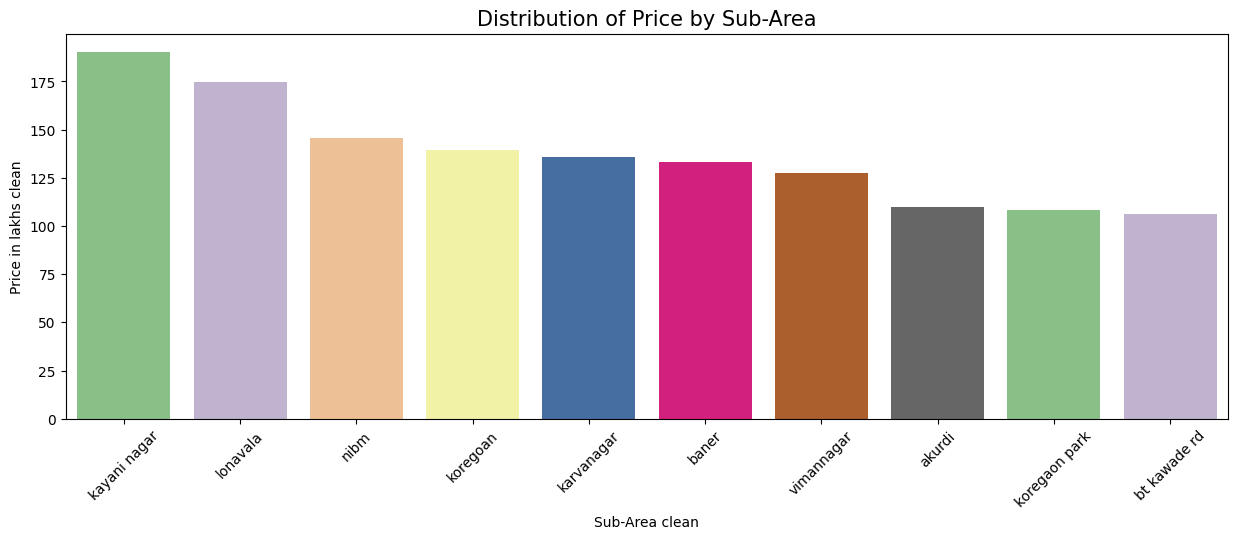

In [23]:
temp = (data.groupby('Sub-Area clean')['Price in lakhs clean'].mean()
            .reset_index().sort_values(by='Price in lakhs clean',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Sub-Area clean'],y=temp['Price in lakhs clean'], palette=("Accent"))
plt.title("Distribution of Price by Sub-Area",size=15)
plt.xticks(rotation=45)
plt.show()

In [25]:
# Saving the mapping dict for inference use
sub_area_price_map = data.groupby('Sub-Area clean')['Price in lakhs clean'].mean().to_dict()

import pickle
fileName = 'model/sub_area_price_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(sub_area_price_map,f)

sub_area_price_map

{'akurdi': 109.66666666666667,
 'balewadi': 83.75,
 'baner': 132.9650000254313,
 'bavdhan': 58.0439998626709,
 'bavdhan budruk': 63.28333346048991,
 'bt kawade rd': 106.04899978637695,
 'dhanori': 81.75,
 'hadapsar': 75.63750076293945,
 'handewadi': 45.688182310624555,
 'hinjewadi': 87.52666727701823,
 'karvanagar': 135.8,
 'kayani nagar': 190.2999999999999,
 'keshav nagar': 49.5,
 'kharadi': 66.31062531471252,
 'kirkatwadi sinhagad road': 20.666666666666668,
 'kiwale': 69.66499837239583,
 'koregaon park': 108.5,
 'koregoan': 139.5,
 'lonavala': 174.64999999999995,
 'magarpatta': 88.0,
 'mahalunge': 73.55555555555556,
 'manjri': 64.9,
 'mohammadwadi': 45.60000038146973,
 'mundhwa': 47.80400009155274,
 'nibm': 145.575,
 'pimpri pune': 54.0,
 'pisoli': 95.99833386739091,
 'ravet': 86.58333333333333,
 'susgaon': 55.239999771118164,
 'talegoan': 15.24000024795532,
 'tathawade': 54.0,
 'undri': 45.30000114440918,
 'vimannagar': 127.5,
 'wadgaon sheri': 69.12111070421007}

In [27]:
# creating the price by sub-area feature
data['Price by sub-area'] =  data.groupby('Sub-Area clean')['Price in lakhs clean'].transform('mean')
data.head(3)

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs clean,log Price in lakhs clean,Price by sub-area
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0,3.688879,58.044
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0,4.189655,58.044
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0,4.317488,58.044


<Axes: >

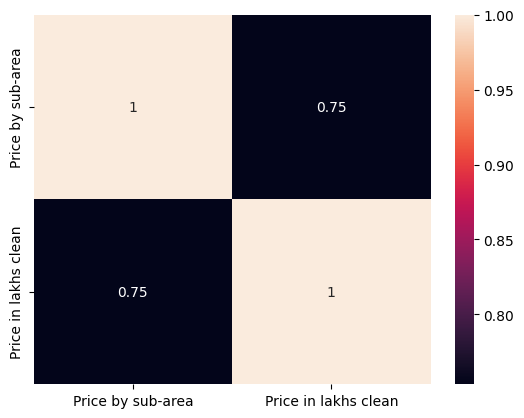

In [29]:
# checking the correlation of the feature
sns.heatmap(data[['Price by sub-area','Price in lakhs clean']].corr(), annot=True)

In [31]:
amenities_col = ['Property Type clean', 'ClubHouse Clean', 'School / University in Township Clean', 'Hospital in TownShip Clean', 'Mall in TownShip Clean', 'Park / Jogging track Clean', 'Swimming Pool Clean']
print(amenities_col)

['Property Type clean', 'ClubHouse Clean', 'School / University in Township Clean', 'Hospital in TownShip Clean', 'Mall in TownShip Clean', 'Park / Jogging track Clean', 'Swimming Pool Clean']


In [32]:
temp = data[amenities_col]
temp['Amenities score'] = temp.sum(axis=1)
temp['Price'] = data['Price in lakhs clean']
temp.head(3)

,Property Type clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Amenities score,Price
0,1.0,1,1,1,1,1,1,7.0,39.0
1,2.0,1,1,1,1,1,1,8.0,65.0
2,3.0,1,1,1,1,1,1,9.0,74.0


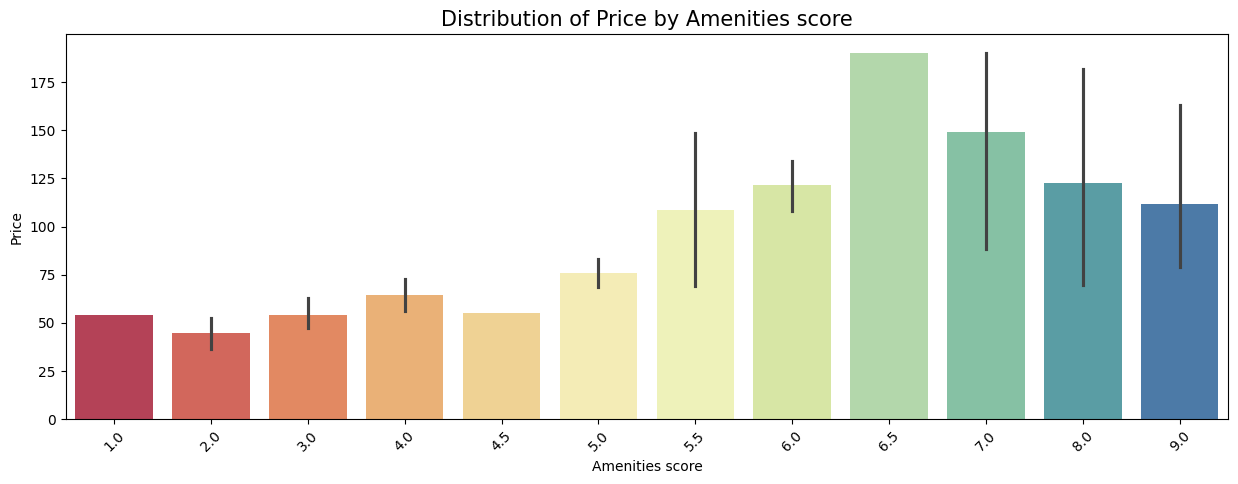

In [34]:
temp2 = (temp.groupby('Amenities score')['Price'].mean()
            .reset_index().sort_values(by='Price',ascending=False)[:10])

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Amenities score'],y=temp['Price'], palette=("Spectral"))
plt.title("Distribution of Price by Amenities score",size=15)
plt.xticks(rotation=45)
plt.show()

In [35]:
# Adding the amenitites score feature
data['Amenities score'] = temp['Amenities score']

In [37]:
# Saving the mapping dict for inference use
amenities_score_price_map = data.groupby('Amenities score')['Price in lakhs clean'].mean().to_dict()

import pickle
fileName = 'model/amenities_score_price_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(amenities_score_price_map,f)

amenities_score_price_map

{1.0: 54.0,
 2.0: 44.91599998474121,
 3.0: 54.24677473498929,
 4.0: 64.43418602610744,
 4.5: 55.22000122070312,
 5.0: 75.72947364940978,
 5.5: 108.64199920654296,
 6.0: 121.51725002288818,
 6.5: 190.29999999999987,
 7.0: 148.97999999999993,
 8.0: 122.5,
 9.0: 111.5}

In [38]:
data['Price by Amenities score'] =  data.groupby('Amenities score')['Price in lakhs clean'].transform('mean')
print(data.shape)
data.head(3)

(200, 21)


,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,...,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs clean,log Price in lakhs clean,Price by sub-area,Amenities score,Price by Amenities score
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,...,1,1,1,1,492.0,39.0,3.688879,58.044,7.0,148.98
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,...,1,1,1,1,774.0,65.0,4.189655,58.044,8.0,122.50
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,...,1,1,1,1,889.0,74.0,4.317488,58.044,9.0,111.50


In [1]:
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
import nltk


In [6]:
nltk.download()

KeyboardInterrupt: 

In [ ]:
nltk.download('stopwords')

In [7]:
from nltk.corpus import stopwords

stopwords.words('english')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/shobot/nltk_data'
    - '/home/shobot/PycharmProjects/environment/Real Estate Price Prediction/nltk_data'
    - '/home/shobot/PycharmProjects/environment/Real Estate Price Prediction/share/nltk_data'
    - '/home/shobot/PycharmProjects/environment/Real Estate Price Prediction/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [3]:
print('Stopwords:- ',set(stopwords.words('english')))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/shobot/nltk_data'
    - '/home/shobot/PycharmProjects/environment/Real Estate Price Prediction/nltk_data'
    - '/home/shobot/PycharmProjects/environment/Real Estate Price Prediction/share/nltk_data'
    - '/home/shobot/PycharmProjects/environment/Real Estate Price Prediction/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [13]:
from wordcloud import WordCloud

In [15]:
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(data['Description clean'])
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object